In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
class SineGraph(Dataset):
    def __init__(self, input, seq_len):
        self.input = torch.tensor(np.sin(np.radians(np.arange(0,input))).reshape(-1,1)).float()
        self.seq_len = seq_len

    def __len__(self):
        return len(self.input) - self.seq_len #the limit to which "idx" would increment

    def __getitem__(self, idx): # "idx" always increment in a dataset

        sequence = self.input[idx:idx + self.seq_len]
        label = self.input[idx + self.seq_len]
        return sequence, label


    def PlotPoints(self):
      plt.plot(self.input.numpy())



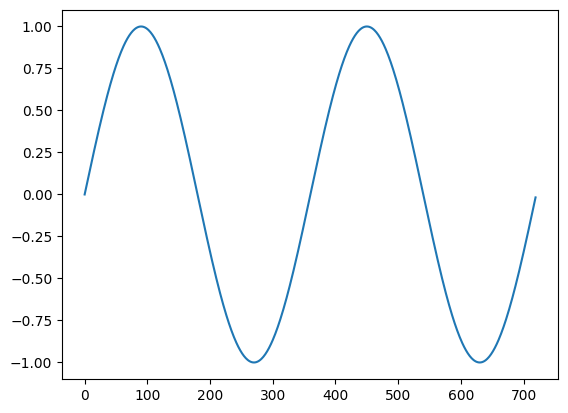

In [ ]:

ds = SineGraph(720, 1)
ds.PlotPoints()
dl = DataLoader(ds, batch_size=1)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class RNN(nn.Module):
    def __init__(self, input_size, HL_size):
        super(RNN, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size,  # Use the input_size variable
                            hidden_size=HL_size,    # Hidden state size (HL_size)
                            num_layers=3,           # Number of LSTM layers
                            bidirectional=True,     # Bidirectional LSTM
                            batch_first=True)       # Input batch first

        self.linear = nn.Linear(2 * HL_size, 32)  # For bidirectional LSTM, multiply by 2
        self.linear2 = nn.Linear(32, 1)  # Output layer with 1 dimension (regression or binary classification)

    def forward(self, x):
        # Forward pass through LSTM
        out, (hn, cn) = self.lstm(x)  # Output and final hidden states

        # Using the final hidden state of the last time step for prediction
        out = out[:, -1, :]  # Take the last time step
        out = self.linear(out)  # Pass through first linear layer
        out = torch.relu(out)   # Apply ReLU activation
        out = self.linear2(out)  # Output layer

        return out




Epoch [1/20], Loss: 0.0030
Epoch [2/20], Loss: 0.0196
Epoch [3/20], Loss: 0.0080
Epoch [4/20], Loss: 0.0348
Epoch [5/20], Loss: 0.0071
Epoch [6/20], Loss: 0.0108
Epoch [7/20], Loss: 0.0153
Epoch [8/20], Loss: 0.0036
Epoch [9/20], Loss: 0.0094
Epoch [10/20], Loss: 0.0584
Epoch [11/20], Loss: 0.0316
Epoch [12/20], Loss: 0.0752
Epoch [13/20], Loss: 0.0379
Epoch [14/20], Loss: 0.0249
Epoch [15/20], Loss: 0.0244
Epoch [16/20], Loss: 0.0257
Epoch [17/20], Loss: 0.0269
Epoch [18/20], Loss: 0.0124
Epoch [19/20], Loss: 0.0065
Epoch [20/20], Loss: 0.0160


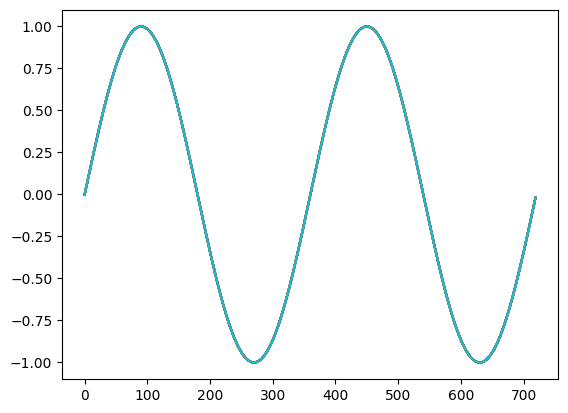

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim


dataloader = dl

# Initialize model, loss function, and optimizer
model = RNN(input_size=1, HL_size=64)  # LSTM input size = 1, hidden layer size = 64
criterion = nn.MSELoss()  # Assuming regression task
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0
    points = []

    plt.plot(points)
    plt.plot(np.sin(np.radians(np.arange(0,720))))

    for inputs, targets in dataloader:
        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        points.append(outputs.detach().squeeze().numpy())


        # Compute loss
        loss = criterion(outputs, targets)
        epoch_loss += loss.item()

        # Backpropagation
        loss.backward()

        # Update weights
        optimizer.step()

    # plt.plot(points)
    # plt.plot(np.sin(np.radians(np.arange(0,720))))
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(dataloader):.4f}')



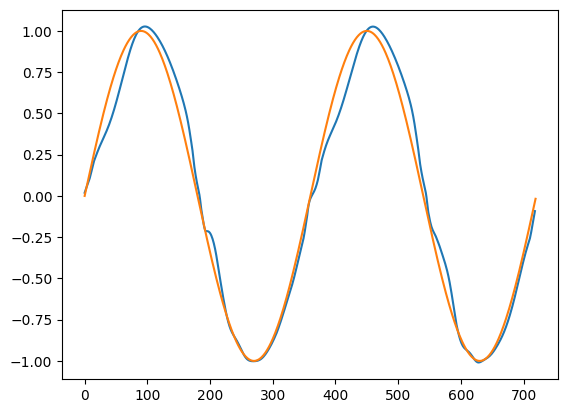

In [ ]:
plt.plot(points)
plt.plot(np.sin(np.radians(np.arange(0,720))))

## Understanding RNN

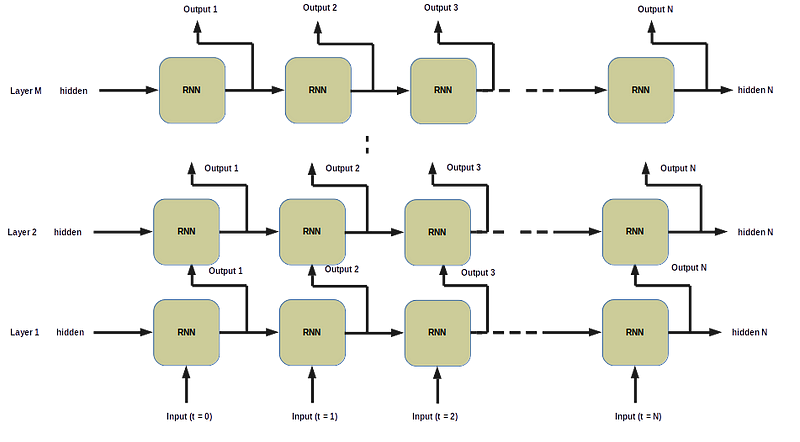

In [ ]:
import torch

rnn = torch.nn.RNN(1,32,1,batch_first=True)

In [ ]:
input = torch.randn([10])

feed = input.view(-1,1)
feed

tensor([[ 0.0463],
        [-1.1404],
        [-0.3384],
        [-0.9801],
        [ 0.3874],
        [ 1.2119],
        [ 1.7018],
        [-1.1822],
        [-0.1563],
        [-1.2831]])

In [ ]:
out,hn= rnn(feed.unsqueeze(0))

print(out)
print("----")
print(hn)

tensor([[[-0.1253,  0.1581,  0.2503,  0.0429,  0.2057,  0.0200, -0.0391,
           0.0207,  0.1312,  0.1003,  0.0958, -0.1630,  0.1479,  0.2489,
          -0.2844, -0.2124,  0.0941,  0.0712, -0.0229,  0.2884,  0.2355,
           0.0555, -0.1899,  0.1127,  0.1590, -0.0449, -0.0517,  0.1351,
           0.1625, -0.1707, -0.2157,  0.1341],
         [-0.2660,  0.0927,  0.3593, -0.0484,  0.1078,  0.1801, -0.1594,
           0.0678, -0.1293, -0.3076,  0.2557, -0.2457,  0.1830,  0.2220,
          -0.1615,  0.0208, -0.0597,  0.3800, -0.1425,  0.2034,  0.2938,
          -0.1602, -0.3968,  0.2697,  0.3166, -0.1377, -0.0140,  0.0662,
           0.2178, -0.0208, -0.2434,  0.3152],
         [-0.0636, -0.0113,  0.2531, -0.1085,  0.0995,  0.0799,  0.0173,
           0.1345,  0.0954, -0.2797,  0.1856, -0.1227,  0.1958,  0.2006,
          -0.2023,  0.0723,  0.0124,  0.2276, -0.0868,  0.3052,  0.2577,
          -0.2154, -0.2977,  0.2298,  0.1756, -0.1769, -0.0817,  0.1774,
           0.0058, -0.1338, -0

In [ ]:
rnn2 = torch.nn.RNN(10,32,1,batch_first=True)

feed2 = torch.randn(10).unsqueeze(0)
rnn2(feed2)


(tensor([[-0.3578,  0.1011, -0.6621,  0.3772,  0.5052,  0.3186,  0.0726, -0.0526,
          -0.2348,  0.4647, -0.0593, -0.7623, -0.6614,  0.5114, -0.5314, -0.1817,
          -0.1369,  0.0319,  0.2430, -0.4229, -0.2403, -0.3628, -0.3414,  0.0869,
          -0.2602, -0.4028, -0.5678,  0.0871,  0.1361, -0.3541, -0.4987,  0.3594]],
        grad_fn=<SqueezeBackward1>),
 tensor([[-0.3578,  0.1011, -0.6621,  0.3772,  0.5052,  0.3186,  0.0726, -0.0526,
          -0.2348,  0.4647, -0.0593, -0.7623, -0.6614,  0.5114, -0.5314, -0.1817,
          -0.1369,  0.0319,  0.2430, -0.4229, -0.2403, -0.3628, -0.3414,  0.0869,
          -0.2602, -0.4028, -0.5678,  0.0871,  0.1361, -0.3541, -0.4987,  0.3594]],
        grad_fn=<SqueezeBackward1>))

In [22]:
rnn_batched = torch.nn.RNN(10,32,2,batch_first=True)
feed_batched = torch.randn(1,10)
out,hn = rnn_batched(feed_batched)
print(out)
print(hn)

tensor([[-0.1841, -0.0726, -0.4665, -0.0482,  0.3043,  0.0369, -0.1540,  0.1564,
         -0.1545, -0.0820, -0.0714,  0.0555, -0.0480,  0.2865, -0.3273,  0.2051,
         -0.0867, -0.2184, -0.2933, -0.0975, -0.3553,  0.1706,  0.0830, -0.0048,
         -0.0459,  0.0211, -0.2102,  0.0324, -0.0723,  0.0657,  0.0432,  0.2541]],
       grad_fn=<SqueezeBackward1>)
tensor([[-0.4077,  0.4019, -0.1964,  0.2477,  0.4826,  0.4431, -0.1544,  0.3805,
         -0.3635, -0.7511,  0.7964, -0.0404, -0.1409, -0.4098, -0.0940, -0.7024,
          0.1975, -0.0619,  0.2385, -0.1577,  0.1792,  0.1273, -0.3801, -0.2136,
         -0.0291, -0.1612,  0.0933, -0.1477,  0.1377,  0.0270, -0.5154, -0.0779],
        [-0.1841, -0.0726, -0.4665, -0.0482,  0.3043,  0.0369, -0.1540,  0.1564,
         -0.1545, -0.0820, -0.0714,  0.0555, -0.0480,  0.2865, -0.3273,  0.2051,
         -0.0867, -0.2184, -0.2933, -0.0975, -0.3553,  0.1706,  0.0830, -0.0048,
         -0.0459,  0.0211, -0.2102,  0.0324, -0.0723,  0.0657,  0.0432,

you don't need to specifiy Batchsize and sequence length to RNN, they captures it by themselves


In [31]:
import torch
rnn_layered = torch.nn.RNN(10,32,2,batch_first=True)
feed_layerd = torch.randn(10,3,10)
print(feed_layerd)
out,hn=rnn_layered(feed_layerd)
print(out)
print("-----------------")
print(hn)

print(out.shape)
print(hn.shape)

tensor([[[-3.5670e-01,  7.9229e-01,  1.3092e+00, -5.3981e-01,  6.2795e-01,
           1.2834e+00,  1.0012e+00,  3.5914e-01,  7.5976e-02, -1.1625e+00],
         [ 8.2177e-01, -1.0840e+00, -1.1564e-01, -2.8255e-01,  1.2771e+00,
           7.2794e-01, -1.0283e+00,  1.0596e+00, -8.7644e-01,  5.6997e-01],
         [-2.5311e-02,  1.8619e-01,  4.8837e-01,  1.1660e+00, -4.0297e-01,
          -6.5472e-01, -2.2110e-02, -7.4908e-01,  3.4349e-01, -1.1933e+00]],

        [[ 4.4487e-01,  4.0704e-01,  7.2739e-01,  1.2686e+00, -6.2144e-01,
          -4.1306e-01, -1.6547e+00, -5.4163e-01, -3.5270e-01,  4.1345e-01],
         [-1.0075e+00,  9.0832e-01, -1.6727e+00,  8.1669e-01,  1.9550e+00,
           8.8277e-02,  8.8127e-01,  7.9975e-01,  1.7488e+00,  5.5160e-01],
         [-2.2761e-01,  1.4916e+00,  8.8680e-01, -1.3915e+00,  1.6117e+00,
           2.7225e+00,  6.9178e-01, -6.6931e-01,  1.1228e+00,  1.5119e-01]],

        [[-2.4255e-01,  5.3918e-01, -9.6251e-01, -1.3771e+00, -2.6235e+00,
          -5.52

Only last output is printed and all hidden outputs are printed. The last output is equivalent to the last hidden layer

In [ ]:
import torch
rnn_directional = torch.nn.RNN(10,32,1,bidirectional=True,batch_first=True)
feed_directional = torch.randn(1,10)
out,hn=rnn_directional(feed_directional)
print(out)
print("-----------------")
print(hn)

tensor([[ 0.0715,  0.2964,  0.4619,  0.3955, -0.4951, -0.3986, -0.0828, -0.2273,
          0.0229, -0.2266, -0.2855,  0.6002, -0.1503,  0.4123,  0.5029,  0.3655,
         -0.6666, -0.1923,  0.3964,  0.2183,  0.1292,  0.2775,  0.5069, -0.3229,
          0.5274, -0.4820, -0.0684, -0.5565,  0.2205, -0.3369,  0.2620, -0.2093,
         -0.3387, -0.5573, -0.5270,  0.1818, -0.3612,  0.1012,  0.1045,  0.2922,
         -0.4249, -0.3137,  0.4438,  0.2124,  0.0591,  0.0520,  0.1580, -0.1244,
          0.7019, -0.1417,  0.5931, -0.4869, -0.1813,  0.2198, -0.2491,  0.3387,
          0.3275,  0.4483,  0.0497, -0.0619,  0.4875, -0.0911, -0.1066,  0.1470]],
       grad_fn=<SqueezeBackward1>)
-----------------
tensor([[ 0.0715,  0.2964,  0.4619,  0.3955, -0.4951, -0.3986, -0.0828, -0.2273,
          0.0229, -0.2266, -0.2855,  0.6002, -0.1503,  0.4123,  0.5029,  0.3655,
         -0.6666, -0.1923,  0.3964,  0.2183,  0.1292,  0.2775,  0.5069, -0.3229,
          0.5274, -0.4820, -0.0684, -0.5565,  0.2205, 

https://www.youtube.com/watch?v=D-a6dwXzJ6s&ab_channel=KrishNaik

In [ ]:
import torch
rnn_layered = torch.nn.RNN(10,32,2,bidirectional=True,batch_first=True)
feed_layerd = torch.randn(1,10)
out,hn=rnn_layered(feed_layerd)
print(out)
print("-----------------")
print(hn)

tensor([[-0.1019, -0.1774, -0.2886,  0.1795,  0.2964, -0.0694,  0.1390, -0.1011,
          0.4271, -0.6449, -0.4264,  0.1492,  0.5687,  0.0899,  0.1313, -0.0201,
         -0.2588, -0.1849, -0.2288, -0.1855,  0.4089, -0.0356, -0.0104,  0.2985,
         -0.0702,  0.1311, -0.5098,  0.0666, -0.2313, -0.3063,  0.3593, -0.1563,
          0.0725, -0.4042, -0.2255, -0.1663, -0.0817, -0.1409, -0.1115,  0.0810,
         -0.0057,  0.6289,  0.0175,  0.3643,  0.7331, -0.6384, -0.0195,  0.0101,
         -0.1217, -0.1702, -0.3687, -0.1760, -0.0951,  0.1175, -0.2280, -0.1348,
         -0.2236, -0.3213, -0.0264,  0.1127, -0.6357, -0.0510, -0.1665,  0.2568]],
       grad_fn=<SqueezeBackward1>)
-----------------
tensor([[ 0.3242, -0.4621, -0.2554, -0.0863,  0.4956, -0.1102, -0.3364,  0.4544,
          0.1790,  0.1720,  0.1988, -0.2627, -0.3513,  0.7575, -0.0478, -0.0179,
          0.2174, -0.4648,  0.4784, -0.4124,  0.6860,  0.0972,  0.2945,  0.0584,
          0.2393, -0.4536, -0.2906, -0.5698, -0.3935, 

### RNN in Computer Vision

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

input_size = 28
sequence_length = 28
num_layers = 2
hidden_size = 256
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 6

class RNN(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,num_classes):
    super(RNN,self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.rnn = nn.LSTM(input_size,hidden_size,num_layers,bidirectional=True,batch_first=True)
    self.fc =nn.Linear(2*hidden_size*sequence_length,num_classes)


  def forward(self,x):
    out,_ = self.rnn(x)
    out = out.reshape(out.shape[0],-1)
    out = self.fc(out)
    return out



train_dataset = datasets.MNIST(root='dataset/',train=True,transform=transforms.ToTensor(),download=True)
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

test_dataset = datasets.MNIST(root='dataset/',train=False,transform=transforms.ToTensor(),download=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

model = RNN(input_size,hidden_size,num_layers,num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

for epoch in range(num_epochs):
  for batch_idx, (data,targets) in enumerate(train_loader):
    data = data.to(device=device).squeeze(1)
    targets = targets.to(device=device)

    # data = data.reshape(data.shape[0],-1)
    scores = model(data)
    loss = criterion(scores,targets)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()


def check_accuracy(loader,model):
  if loader.dataset.train:
    print("Checking accuracy on training data")
  else:
    print("Checking accuracy on test data")
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      x = x.to(device=device).squeeze(1)
      y = y.to(device=device)

      scores = model(x)
      _,predictions = scores.max(1)
      num_correct += (predictions == y).sum()
      num_samples += predictions.size(0)

    print(f"Got {num_correct}/{num_samples} with accuracy \ {float(num_correct)/float(num_samples)*100:.2f}")

  model.train()

check_accuracy(train_loader,model)
check_accuracy(test_loader,model)


Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 56.2MB/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.02MB/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.1MB/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.74MB/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



KeyboardInterrupt: 

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.83MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



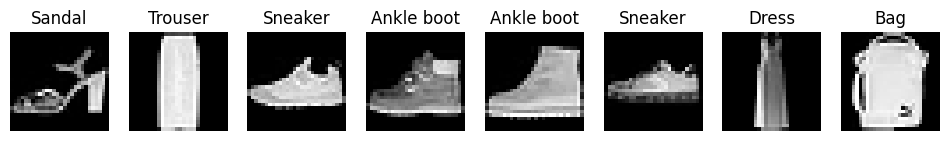

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Fashion MNIST dataset and transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
])

# Load Fashion MNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

# Classes in Fashion MNIST
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to show a batch of images
def show_images(images, labels):
    # Convert images to numpy array
    np_images = images.numpy()

    # Plot the images
    fig, axes = plt.subplots(1, len(images), figsize=(12, 2))
    for i, ax in enumerate(axes):
        ax.imshow(np_images[i][0], cmap='gray')  # Grayscale images
        ax.set_title(classes[labels[i]])
        ax.axis('off')
    plt.show()

# Get a batch of images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show the batch
show_images(images[:8], labels[:8])  # Show the first 8 images


In [41]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

input_size = 28
sequence_length = 28
num_layers = 2
hidden_size = 256
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 6

class RNN(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,num_classes):
    super(RNN,self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers

    self.rnn = nn.LSTM(input_size,hidden_size,num_layers,bidirectional=True,batch_first=True)
    self.fc =nn.Linear(2*hidden_size*sequence_length,num_classes)


  def forward(self,x):
    out,_ = self.rnn(x)
    out = out.reshape(out.shape[0],-1)
    out = self.fc(out)
    return out


# **Change MNIST to FashionMNIST**
train_dataset = datasets.FashionMNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.FashionMNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

model = RNN(input_size,hidden_size,num_layers,num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

for epoch in range(num_epochs):
  for batch_idx, (data,targets) in enumerate(train_loader):
    data = data.to(device=device).squeeze(1)
    targets = targets.to(device=device)

    # data = data.reshape(data.shape[0],-1)
    scores = model(data)
    loss = criterion(scores,targets)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()


def check_accuracy(loader,model):
  if loader.dataset.train:
    print("Checking accuracy on training data")
  else:
    print("Checking accuracy on test data")
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      x = x.to(device=device).squeeze(1)
      y = y.to(device=device)

      scores = model(x)
      _,predictions = scores.max(1)
      num_correct += (predictions == y).sum()
      num_samples += predictions.size(0)

    print(f"Got {num_correct}/{num_samples} with accuracy \ {float(num_correct)/float(num_samples)*100:.2f}")

  model.train()

check_accuracy(train_loader,model)
check_accuracy(test_loader,model)


100%|██████████| 26.4M/26.4M [00:02<00:00, 13.1MB/s]


Extracting dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 207kB/s]


Extracting dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.89MB/s]


Extracting dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.12MB/s]


Extracting dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw

Checking accuracy on training data
Got 55971/60000 with accuracy \ 93.28
Checking accuracy on test data
Got 9016/10000 with accuracy \ 90.16


In [44]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28
sequence_length = 28
num_layers = 2
hidden_size = 256
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 15

# Define the model with CNN blocks + RNN
class CNN_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(CNN_RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # CNN blocks
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # Output: (32, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: (32, 14, 14)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # Output: (64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                  # Output: (64, 7, 7)
        )

        # RNN (LSTM)
        self.rnn = nn.LSTM(7 * 64, hidden_size, num_layers, bidirectional=True, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(2 * hidden_size  , num_classes)

    def forward(self, x):
        # Pass through CNN layers
        x = self.cnn(x)  # Shape: (batch_size, 64, 7, 7)

        # Reshape for RNN: Combine (channel * height) into sequence_length
        x = x.permute(0, 2, 3, 1).contiguous()  # Shape: (batch_size, 7, 7, 64)
        x = x.view(x.size(0), 7, -1)            # Shape: (batch_size, 7, 64*7)

        # Pass through RNN
        out, _ = self.rnn(x)                    # Shape: (batch_size, 7, 2*hidden_size)
        out = self.fc(out[:, -1, :])            # Use the last RNN output for classification
        return out


# Load FashionMNIST dataset
train_dataset = datasets.FashionMNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.FashionMNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss, and optimizer
model = CNN_RNN(input_size, hidden_size, num_layers, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Forward pass
        scores = model(data)
        loss = criterion(scores, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Accuracy check function
def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    accuracy = float(num_correct) / float(num_samples) * 100
    print(f"Accuracy: {accuracy:.2f}%")
    model.train()

check_accuracy(train_loader, model)
check_accuracy(test_loader, model)


Epoch [1/15], Loss: 0.4775
Epoch [2/15], Loss: 0.3757
Epoch [3/15], Loss: 0.1256
Epoch [4/15], Loss: 0.1683
Epoch [5/15], Loss: 0.1313
Epoch [6/15], Loss: 0.1572
Epoch [7/15], Loss: 0.0426
Epoch [8/15], Loss: 0.1341
Epoch [9/15], Loss: 0.1277
Epoch [10/15], Loss: 0.1967
Epoch [11/15], Loss: 0.0450
Epoch [12/15], Loss: 0.0650
Epoch [13/15], Loss: 0.1027
Epoch [14/15], Loss: 0.1093
Epoch [15/15], Loss: 0.0151
Checking accuracy on training data
Accuracy: 98.72%
Checking accuracy on test data
Accuracy: 91.91%


In [45]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28
sequence_length = 28
num_layers = 2
hidden_size = 256
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 15

# Define the model with CNN blocks + RNN
class CNN_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(CNN_RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # CNN blocks
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # Output: (32, 28, 28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: (32, 14, 14)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # Output: (64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                  # Output: (64, 7, 7)
        )

        # RNN (LSTM)
        self.rnn = nn.LSTM(7 * 64, hidden_size, num_layers, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_size * 7, num_classes)

    def forward(self, x):
        # Pass through CNN layers
        x = self.cnn(x)  # Shape: (batch_size, 64, 7, 7)

        # Reshape for RNN: Combine (channel * height) into sequence_length
        x = x.permute(0, 2, 3, 1).contiguous()  # Shape: (batch_size, 7, 7, 64)
        x = x.view(x.size(0), 7, -1)            # Shape: (batch_size, 7, 64*7)

        # Pass through RNN
        out, _ = self.rnn(x)                    # Shape: (batch_size, 7, 2*hidden_size)
        out = out.reshape(out.size(0), -1)      # Flatten all hidden states: (batch_size, 7*2*hidden_size)

        # Pass through fully connected layer
        out = self.fc(out)                      # Shape: (batch_size, num_classes)
        return out


# Load FashionMNIST dataset
train_dataset = datasets.FashionMNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.FashionMNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss, and optimizer
model = CNN_RNN(input_size, hidden_size, num_layers, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Forward pass
        scores = model(data)
        loss = criterion(scores, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Accuracy check function
def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    accuracy = float(num_correct) / float(num_samples) * 100
    print(f"Accuracy: {accuracy:.2f}%")
    model.train()

check_accuracy(train_loader, model)
check_accuracy(test_loader, model)


Epoch [1/15], Loss: 0.1408
Epoch [2/15], Loss: 0.1658
Epoch [3/15], Loss: 0.2405
Epoch [4/15], Loss: 0.0505
Epoch [5/15], Loss: 0.3765
Epoch [6/15], Loss: 0.2320
Epoch [7/15], Loss: 0.1003
Epoch [8/15], Loss: 0.0260
Epoch [9/15], Loss: 0.1995
Epoch [10/15], Loss: 0.2125
Epoch [11/15], Loss: 0.0284
Epoch [12/15], Loss: 0.0587
Epoch [13/15], Loss: 0.0261
Epoch [14/15], Loss: 0.0014
Epoch [15/15], Loss: 0.0099
Checking accuracy on training data
Accuracy: 99.04%
Checking accuracy on test data
Accuracy: 91.88%


RNN With attention Mechanism

https://www.youtube.com/watch?v=JpwoFF0o-bI&ab_channel=NeilRhodes

https://medium.datadriveninvestor.com/attention-in-rnns-321fbcd64f05